## Feature Scaling [ MIN - MAX Scale and StandardScale ]
    Feature scaling is a data preprocessing technique used to standardize the range of independent variables [features] so that no feature dominates others due to its scale.
    It transforms features to a similar numerical range without changing their meaning

### Why Is Feature Scaling Needed?
    Real-world datasets often contain features with very different units and magnitudes.
    Example:
    Age → 0–100
    Income → 10,000–1,000,000
    
    Without scaling:
    Models may give more importance to large-scale features
    Distance calculations become biased
    Optimization becomes slow or unstable

### Types of Feature Scaling
    1. Min–Max Scaling (Normalization)
    Transforms features into a fixed range, usually [0, 1]
    Minimum value → 0
    Maximum value → 1
    Best used when ::
     - Data has known bounds
     - No extreme outliers
    Sensitive to outliers

    2. Standardization (Z-Score Scaling)
    Centers data around mean = 0 with standard deviation = 1.
    Measures how far a value is from the mean
    Best used when ::
     - Data follows normal distribution
     - Algorithms assume zero-centered data
    Still affected by extreme outliers (less than Min–Max)

### Which Algorithms Need Feature Scaling?
    - Algorithms Sensitive to Scale (Scaling Required)
    Linear Regression, Logistic Regression
    K-Nearest Neighbors (KNN), Support Vector Machine (SVM)
    K-Means Clustering, PCA
    Neural Networks
    
    - Algorithms Not Sensitive to Scale (Scaling Optional)
    Decision Trees, Random Forest
    Gradient Boosting (XGBoost, LightGBM)
    Rule-based models

### Importing Essentital Libraries

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

### Load titanic dataset seaborn

In [46]:
data = sns.load_dataset("titanic") 
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


### Extracting feature 

In [48]:
data1 = data[['survived','pclass','parch']]
data1.head(2)

,survived,pclass,parch
0,0,3,0
1,1,1,0


### Checking for null values 

In [50]:
data1.isnull().sum()

survived    0
pclass      0
parch       0
dtype: int64

### Dividing dataset into input and output feature
     X -> Input feature
     y -> Output feature

In [52]:
X = data1.drop(['survived'],axis = 1)
X.head(2)

,pclass,parch
0,3,0
1,1,0


In [53]:
y = data1[['survived']]
y.head(2)

,survived
0,0
1,1


### Spliting data into Train - Test data 
     80 % -> Training set
     20 % -> Testing set
     with a fixed random_state (42) for reproducibility

In [55]:
X_train, X_test,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print('Shape of X_train : ',X_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of y_train : ',y_train.shape)
print('Shape of y_test : ',y_test.shape)

Shape of X_train :  (712, 2)
Shape of X_test :  (179, 2)
Shape of y_train :  (712, 1)
Shape of y_test :  (179, 1)


### Standardization using StandardScaler()

In [57]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

###  For X_train

In [59]:
 
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc,columns=['pclass','parch'])
X_train_sc.head(2).round(2)

,pclass,parch
0,-1.61,-0.48
1,-0.40,-0.48


### For X_test

In [61]:
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc,columns=['pclass','parch'])
X_test_sc.head(2).round(2)

,pclass,parch
0,0.81,0.78
1,-0.40,-0.48


### Plotting 

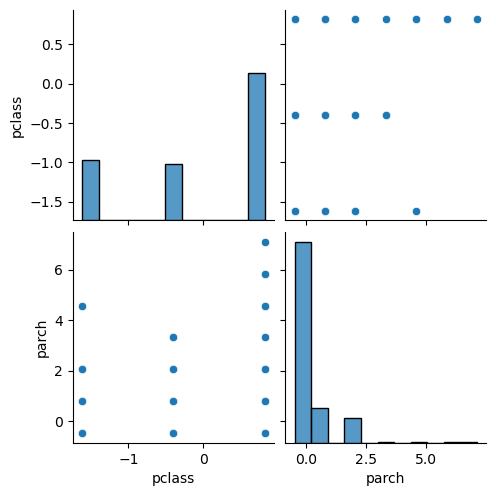

In [64]:
sns.pairplot(X_train_sc)
plt.show()

### MinMaxScaler

In [66]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [67]:
X_train_mmc = mmc.transform(X_train)
X_train_mmc = pd.DataFrame(X_train_mmc,columns=['pclass','parch'])
X_train_mmc.head(2).round(2)

,pclass,parch
0,0.0,0.0
1,0.5,0.0


In [68]:
X_test_mmc = mmc.transform(X_test)
X_test_mmc = pd.DataFrame(X_test_mmc,columns=['pclass','parch'])
X_test_mmc.head(2).round(2)

,pclass,parch
0,1.0,0.17
1,0.5,0.00


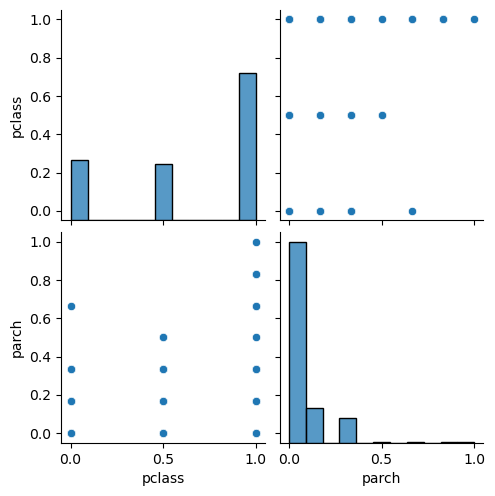

In [69]:
sns.pairplot(X_train_mmc)
plt.show()